In [1]:
import pandas as pd
import numpy as np
import re

I used the Kaggle dataset on loans and dataset downloaded directly from Lending Club. The Kaggle data set is dated compared to the one I got from Lending club, so I can track the life of loans and analyze the ones which changed their status.

Below consider Loan Transitional Matrices to understand the distribution of Loans within the merged datasets.

In [2]:
table1 = pd.read_csv("LoanMatrixFreq.csv")
table2 = pd.read_csv("LoanMatrixCondFreq.csv")

Distribution of different types of loans for which the status have changed.

In [3]:
table1

,Unnamed: 0,Total,Charged Off,Current,Default,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days)
0,Current,0.764638,0.040037,0.000000,0.001365,0.547387,0.063471,0.020309,0.092069
1,Late (31-120 days),0.090385,0.081329,0.004692,0.000219,0.001971,0.001508,0.000665,0.000000
2,Issued,0.071263,0.000126,0.066622,0.000000,0.003336,0.000034,0.000143,0.001002
3,In Grace Period,0.045024,0.009645,0.023333,0.000042,0.005686,0.000000,0.001542,0.004776
4,Late (16-30 days),0.018692,0.009965,0.004768,0.000051,0.001331,0.000219,0.000000,0.002359
5,Default,0.009999,0.009915,0.000025,0.000000,0.000017,0.000000,0.000000,0.000042


For each initial status, the table below shows the distribution of new statuses.

In [4]:
table2

,Unnamed: 0,Total,Charged Off,Current,Default,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days)
0,Current,1.0,0.052361,0.000000,0.001785,0.715877,0.083008,0.026560,0.120409
1,Default,1.0,0.991575,0.002527,0.000000,0.001685,0.000000,0.000000,0.004212
2,In Grace Period,1.0,0.214219,0.518241,0.000935,0.126286,0.000000,0.034238,0.106080
3,Issued,1.0,0.001773,0.934870,0.000000,0.046809,0.000473,0.002009,0.014066
4,Late (16-30 days),1.0,0.533123,0.255070,0.002704,0.071203,0.011717,0.000000,0.126183
5,Late (31-120 days),1.0,0.899814,0.051911,0.002423,0.021808,0.016682,0.007363,0.000000


In [5]:
data = pd.read_csv("LoanData.csv")

In [6]:
data.shape

(118715, 51)

In [7]:
data.head()[['loan_status_x','loan_status_y']]
data['loan_status_y'].value_counts()

Fully Paid            66448
Charged Off           17928
Late (31-120 days)    11901
Current               11805
In Grace Period        7744
Late (16-30 days)      2690
Default                 199
Name: loan_status_y, dtype: int64

In [8]:
data.iloc[0]

Unnamed: 0                                                       0
id                                                        10148122
member_id_x                                               11999781
merge_source                                         Loans, df1314
acc_now_delinq_x                                                 0
addr_state_x                                                    TX
annual_inc                                                   96500
application_type_x                                      INDIVIDUAL
avg_cur_bal                                                  11783
bc_open_to_buy                                                2441
bc_util                                                       83.5
chargeoff_within_12_mths                                         0
delinq_2yrs_x                                                    0
delinq_amnt                                                      0
dti_x                                                        1

### Issue dates.

In [9]:
print(min(data.issue_d_x),max(data.issue_d_x))

2012-03-01 2015-12-01


### Formatting Data.

In [ ]:
data.acc_now_delinq_x.astype(bool)
data.annual_inc.astype(float)
data.avg_cur_bal.astype(float)
data.bc_util.astype(float)
data.bc_open_to_buy.astype(float)
data.chargeoff_within_12_mths.astype(bool)
data.delinq_2yrs_x.astype(int)
data.delinq_amnt.astype(float)
data.dti_x.astype(float)
data.funded_amnt_x.astype(float)
data.installment_x.astype(float)
data.int_rate_x.astype(float)
data.loan_amnt_x.astype(float)
data.mort_acc.astype(int)
data.mths_since_last_delinq_x.astype(float)
data.mths_since_last_delinq_y.astype(float)
data.open_acc_x.astype(int)
data.out_prncp_x.astype(float)
data.out_prncp_inv_x.astype(float)
data.out_prncp_y.astype(float)
data.pub_rec.astype(int)
data.pub_rec_bankruptcies.astype(int)
data.tot_cur_bal.astype(float)
data.total_acc_x.astype(float)
data.total_pymnt_x.astype(float)
data.total_pymnt_y.astype(float);
data.term_x = data.term_x.str.extract('([0-9]+)').astype(float)
data.zip_code = data.zip_code.str.extract('([0-9]+)').astype(float);

In [11]:
def emp_years(x):
    if x == 'n/a':
        return None
    elif re.match('<',x):
        return 0
    else:
        return float(re.search('([0-9]+)',x).group(0))
    
    
data.emp_length_x = data.emp_length_x.apply(lambda x: emp_years(x))
data.emp_length_x.value_counts()

10.0    38463
2.0     10529
0.0      9672
3.0      9632
1.0      7786
5.0      7344
4.0      6691
8.0      5981
7.0      5841
6.0      5744
9.0      4663
Name: emp_length_x, dtype: int64

In [12]:
sum(data.emp_length_x.isnull())

6369

In [13]:
#Consider Binning
#data.addr_state_x.value_counts()
#data.emp_title_x.value_counts()
#data.title_x.value_counts();

### Categorical Variables.

In [14]:
data.home_ownership_x.value_counts()

MORTGAGE    58093
RENT        48691
OWN         11931
Name: home_ownership_x, dtype: int64

In [15]:
data.purpose_x.value_counts()

debt_consolidation    72585
credit_card           25847
home_improvement       7049
other                  5619
major_purchase         2153
small_business         1268
medical                1122
car                     988
moving                  708
vacation                657
house                   494
wedding                 155
renewable_energy         69
educational               1
Name: purpose_x, dtype: int64

In [16]:
data.application_type_x.value_counts()

INDIVIDUAL    118613
JOINT            102
Name: application_type_x, dtype: int64

In [17]:
data.verification_status_x.value_counts()

Source Verified    43367
Verified           41882
Not Verified       33466
Name: verification_status_x, dtype: int64

In [18]:
#Convert to bool
data.verification_status_x = data.verification_status_x.apply(lambda x: 1 if (x == 'Source Verified') or (x == 'Verified') else 0);
data.verification_status_x.value_counts()

1    85249
0    33466
Name: verification_status_x, dtype: int64

In [19]:
data.emp_length_x.value_counts()

10.0    38463
2.0     10529
0.0      9672
3.0      9632
1.0      7786
5.0      7344
4.0      6691
8.0      5981
7.0      5841
6.0      5744
9.0      4663
Name: emp_length_x, dtype: int64

In [20]:
data.sub_grade_x.value_counts()

B4    7104
C1    7022
C4    6938
C3    6928
B3    6909
C2    6760
B2    6194
B5    6115
C5    5905
D1    5335
B1    5187
A5    4982
D2    4549
D3    3990
D4    3963
A4    3537
D5    3415
E1    2879
E2    2761
A3    2437
A1    2391
A2    2355
E3    2318
E4    1916
E5    1639
F1    1264
F2     979
F3     788
F4     588
F5     459
G1     373
G2     276
G3     205
G4     140
G5     114
Name: sub_grade_x, dtype: int64

In [21]:
data.grade_x.value_counts()

C    33553
B    31509
D    21252
A    15702
E    11513
F     4078
G     1108
Name: grade_x, dtype: int64

In [22]:
dictionaryLC = pd.read_csv("LCFinalDictionary.csv", header=None, usecols=[0,1], names=['Feature','Description'])
pd.options.display.max_colwidth = 120
dictionaryLC

,Feature,Description
0,id,unique loan ID
1,member_id_x,unique member ID
2,merge_source,source files used
3,acc_now_delinq_x,The number of accounts on which the borrower is now delinquent.
4,addr_state_x,The state provided by the borrower in the loan application
5,annual_inc,The self-reported annual income provided by the borrower during registration.
6,application_type_x,Indicates whether the loan is an individual application or a joint application with two co-borrowers
7,avg_cur_bal,Average current balance of all accounts
8,bc_open_to_buy,Total open to buy on revolving bankcards.
9,bc_util,Ratio of total current balance to high credit/credit limit for all bankcard accounts.


### Fields to Use:


'annual_inc', 'avg_cur_bal', 'dti_x', 'tot_cur_bal' - these could all be dependent


'emp_length_x', 'funded_amnt_x', 'int_rate_x', 'out_prncp_x'  - numeric


'grade_x', 'purpose_x', 'verification_status_x', 'addr_state_x' - categorical

### Can later add: 
'acc_now_delinq_x', 'chargeoff_within_12_mths', 'delinq_2yrs_x', 'emp_title_x', 'sub_grade_x', 	'home_ownership_x', 	'issue_d_x', 'mort_acc', 'pub_rec_bankruptcies', 'pub_rec', 'term_x, title_x'.


### Checking Collinearity of Features Related to Account Balance.

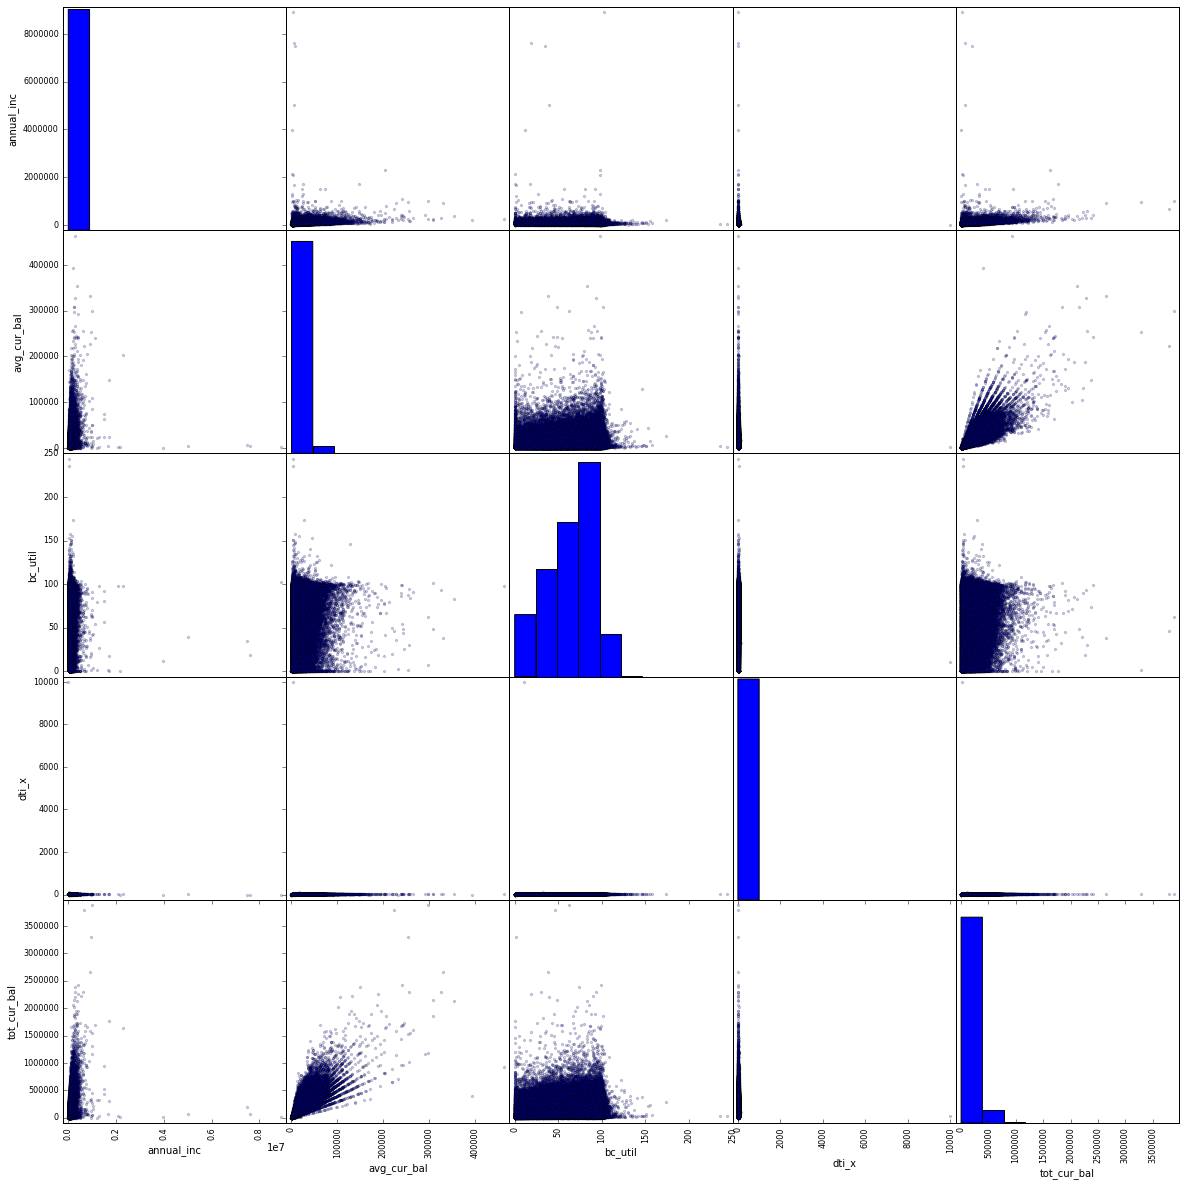

In [23]:
%matplotlib inline

pd.tools.plotting.scatter_matrix(data[['annual_inc',
                                       'avg_cur_bal', #Average current balance of all accounts
                                       'bc_util',     #Ratio of total current balance to high credit/credit limit for all bankcard accounts.
                                       'dti_x',       #debt to income ration
                                       'tot_cur_bal']],#Total current balance of all accounts
                                  alpha = 0.2, figsize=(20,20));

### Consider two problems.

#### Problem1


For loans in "In Grace Period" or "Late (16-30 days)" predict whether they improve 1 = {"Current" , "Paid Off", "In Grace period"} or they continue to not paying 0 = {"Late (31-120 days)", "Charge off", "Default"}

#### Problem 2.

Consider loans that are current to track whether they Paid off or Defaulted.